##### Question 7 -

Using the data from Question 4, write code to analyze the data and answer the following questions

Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000 kg


In [65]:
import requests
import pandas as pd

# Define the URL to download the data
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Send a GET request to download the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Load the data into a pandas DataFrame
    data = pd.read_json(response.text)

    # Specify the desired data attributes
    attributes = ['name', 'id', 'nametype', 'recclass', 'mass', 'year', 'reclat', 'reclong']
    
    # Select only the desired attributes from the DataFrame
    filtered_data = data[attributes]
    
    # Save the filtered data as a CSV file
    filtered_data.to_csv('meteorite_data.csv', index=False)
    print("Data saved successfully as CSV file.")
else:
    print("Failed to retrieve data from the provided link.")

Data saved successfully as CSV file.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('meteorite_data.csv')

In [78]:
df.head()

,name,id,nametype,recclass,mass,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,1880-01-01T00:00:00.000,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,1951-01-01T00:00:00.000,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,1952-01-01T00:00:00.000,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01T00:00:00.000,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,1902-01-01T00:00:00.000,-33.16667,-64.95000


In [73]:
import numpy as np

In [79]:
# Clean and convert the 'year' column to datetime format
df['year'] = df['year'].str[:4]  # Extract the first 4 characters representing the year
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

In [80]:
df['year']

0     1880-01-01
1     1951-01-01
2     1952-01-01
3     1976-01-01
4     1902-01-01
         ...    
995   1934-01-01
996   2011-01-01
997   1869-01-01
998   1922-01-01
999   1905-01-01
Name: year, Length: 1000, dtype: datetime64[ns]

In [81]:
# Get all Earth meteorites that fell before the year 2000
before_2000 = df[df['year'] < '2000']


In [82]:
before_2000

,name,id,nametype,recclass,mass,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000
995,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333
998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333


In [83]:
# Get all Earth meteorites coordinates that fell before the year 1970
before_1970 = df[df['year'] < '1970']

In [84]:
before_1970

,name,id,nametype,recclass,mass,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000
5,Adhi Kot,379,Valid,EH4,4239.0,1919-01-01,32.10000,71.80000
...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000
995,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333
998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333


In [85]:
# Get all Earth meteorites with mass greater than 10000 kg
mass_gt_10000 = df[df['mass'] > 10000]

In [86]:
mass_gt_10000

,name,id,nametype,recclass,mass,year,reclat,reclong
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000
7,Agen,392,Valid,H5,30000.0,1814-01-01,44.21667,0.61667
11,Aïr,424,Valid,L6,24000.0,1925-01-01,19.08333,8.38333
16,Akyumak,433,Valid,"Iron, IVA",50000.0,1981-01-01,39.91667,42.81667
27,Alfianello,466,Valid,L6,228000.0,1883-01-01,45.26667,10.15000
...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,1878-01-01,49.60000,17.11667
992,Tilden,23998,Valid,L6,74800.0,1927-01-01,38.20000,-89.68333
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333


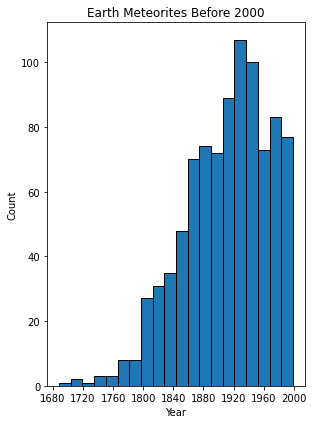

In [93]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot 1: Earth meteorites before 2000
plt.subplot(1, 3, 1)
plt.hist(before_2000['year'], bins=20, edgecolor='black')
plt.title('Earth Meteorites Before 2000')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

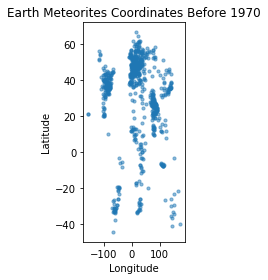

In [92]:
# Plot 2: Earth meteorites coordinates before 1970
plt.subplot(1, 3, 2)
plt.scatter(before_1970['reclong'], before_1970['reclat'], s=10, alpha=0.5)
plt.title('Earth Meteorites Coordinates Before 1970')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

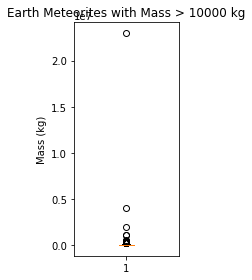

In [91]:
# Plot 3: Earth meteorites with mass > 10000 kg
plt.subplot(1, 3, 3)
plt.boxplot(mass_gt_10000['mass'])
plt.title('Earth Meteorites with Mass > 10000 kg')
plt.ylabel('Mass (kg)')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()